In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [3]:
import lib.marking_evaluation as meval
import lib.draw as draw

In [4]:
def plot_team(team, save_fig_dir='', dpi=1200, adversary=meval.default_adversary_1):
    team = [float(i) for i in team.replace('[','').replace(']','').replace(' ','').split(',')]
    aux = []
    for i in range(10):
        aux.append([team[2*i], team[2*i+1]])
    team = meval.create_team(aux)

    adversary.plot_result(team, save_fig_dir=save_fig_dir)

In [5]:
meval.default_adversary_1.plot_team(dpi=1200)
plt.savefig('img/pitch_viz/100_default_adversary.pdf', format='pdf', bbox_inches='tight')

In [6]:
draw.pitch(dpi = 1200)
attacking_team = [(player.x, player.y, 0) for player in meval.default_442_formation.players]
for i, player in enumerate(attacking_team):
    plt.scatter(player[0], player[1], s=75, color='orange', edgecolors='C1', linewidths=1,  zorder=10)
    plt.text(player[0], player[1], i, zorder=11, fontsize='xx-small', color='white', ha='center', va='center')
plt.savefig('img/pitch_viz/101_442_formation.pdf', format='pdf', bbox_inches='tight')

# Isolated criteria

In [7]:
res_criteria_1 = pd.read_csv('results/hillclimb_criteria_1000_daThuJun102118142021.csv')
plot_team(res_criteria_1[res_criteria_1.fitness == res_criteria_1.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/ic_1000.pdf')

<Figure size 1260x816 with 0 Axes>

In [8]:
res_criteria_1 = pd.read_csv('results/hillclimb_criteria_0100_daThuJun102119432021.csv')
plot_team(res_criteria_1[res_criteria_1.fitness == res_criteria_1.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/ic_0100.pdf')

<Figure size 1260x816 with 0 Axes>

In [9]:
res_criteria_1 = pd.read_csv('results/hillclimb_criteria_0010_daThuJun102129432021.csv')
plot_team(res_criteria_1[res_criteria_1.fitness == res_criteria_1.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/ic_0010.pdf')

<Figure size 1260x816 with 0 Axes>

In [10]:
res_criteria_1 = pd.read_csv('results/hillclimb_criteria_0001_daThuJun102145242021.csv')
plot_team(res_criteria_1[res_criteria_1.fitness == res_criteria_1.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/ic_0001.pdf')

<Figure size 1260x816 with 0 Axes>

# Random Search

In [11]:
randsearch = [pd.read_csv(f) for f in glob('results/random_search_da*.csv')]
for res in randsearch: res.fitness = res.fitness.clip(0)
worse_randsearch = randsearch[[df.fitness.max() for df in randsearch].index(min([df.fitness.max() for df in randsearch]))]
best_randsearch = randsearch[[df.fitness.max() for df in randsearch].index(max([df.fitness.max() for df in randsearch]))]
avg_randsearch = randsearch[0].fitness.rolling(60000, min_periods=1).max()
for res in randsearch[1:]: avg_randsearch += res.fitness.rolling(60000, min_periods=1).max()
avg_randsearch /= 20

In [12]:
plot_team(best_randsearch[best_randsearch.fitness == best_randsearch.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/101_best_random.pdf')

<Figure size 1260x816 with 0 Axes>

# Optuna CMA-ES

In [13]:
cmaes = [pd.read_csv(f) for f in glob('results/optunacmaes*.csv')]
for res in cmaes: res.fitness = res.fitness.clip(0)
worse_cmaes = cmaes[[df.fitness.max() for df in cmaes].index(min([df.fitness.max() for df in cmaes]))]
best_cmaes = cmaes[[df.fitness.max() for df in cmaes].index(max([df.fitness.max() for df in cmaes]))]
avg_cmaes = cmaes[0].fitness.rolling(60000, min_periods=1).max()
for res in cmaes[1:]: avg_cmaes += res.fitness.rolling(60000, min_periods=1).max()
avg_cmaes /= 20

In [14]:
plot_team(best_cmaes[best_cmaes.fitness == best_cmaes.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/102_best_cmaes.pdf')

<Figure size 1260x816 with 0 Axes>

# Optuna TPE

In [15]:
tpe = [pd.read_csv(f) for f in glob('results/optunatpe*.csv')]
for res in tpe: res.fitness = res.fitness.clip(0)
worse_tpe = tpe[[df.fitness.max() for df in tpe].index(min([df.fitness.max() for df in tpe]))]
best_tpe = tpe[[df.fitness.max() for df in tpe].index(max([df.fitness.max() for df in tpe]))]
avg_tpe = tpe[0].fitness.rolling(60000, min_periods=1).max()
for res in tpe[1:]: avg_tpe += res.fitness.rolling(60000, min_periods=1).max()
avg_tpe /= 20

In [16]:
plot_team(best_tpe[best_tpe.fitness == best_tpe.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/103_best_tpe.pdf')

<Figure size 1260x816 with 0 Axes>

# Hill climb   

In [17]:
hillclimb = [pd.read_csv(f) for f in glob('results/hillclimb_da*.csv')]
for res in hillclimb: res.fitness = res.fitness.clip(0)
worse_hillclimb = hillclimb[[df.fitness.max() for df in hillclimb].index(min([df.fitness.max() for df in hillclimb]))]
best_hillclimb = hillclimb[[df.fitness.max() for df in hillclimb].index(max([df.fitness.max() for df in hillclimb]))]
avg_hillclimb = hillclimb[0].fitness.rolling(60000, min_periods=1).max()
for res in hillclimb[1:]: avg_hillclimb += res.fitness.rolling(60000, min_periods=1).max()
avg_hillclimb /= 20

In [18]:
plot_team(best_hillclimb[best_hillclimb.fitness == best_hillclimb.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/105_best_hclimb.pdf')

<Figure size 1260x816 with 0 Axes>

# Simulated Annealing

In [19]:
simanneal = [pd.read_csv(f) for f in glob('results/simula*.csv')]
for res in simanneal: res.fitness = res.fitness.clip(0)
worse_simanneal = simanneal[[df.fitness.max() for df in simanneal].index(min([df.fitness.max() for df in simanneal]))]
best_simanneal = simanneal[[df.fitness.max() for df in simanneal].index(max([df.fitness.max() for df in simanneal]))]
avg_simanneal = simanneal[0].fitness.rolling(60000, min_periods=1).max()
for res in simanneal[1:]: avg_simanneal += res.fitness.rolling(60000, min_periods=1).max()
avg_simanneal /= 20

In [20]:
plot_team(best_simanneal[best_simanneal.fitness == best_simanneal.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/106_best_sanneal.pdf')

<Figure size 1260x816 with 0 Axes>

# Genetic Algorithms

In [21]:
genetic = [pd.read_csv(f) for f in glob('results/gen*.csv')]
for res in genetic: res.fitness = res.fitness.clip(0)
worse_genetic = genetic[[df.fitness.max() for df in genetic].index(min([df.fitness.max() for df in genetic]))]
best_genetic = genetic[[df.fitness.max() for df in genetic].index(max([df.fitness.max() for df in genetic]))]
avg_genetic = genetic[0].fitness.rolling(60000, min_periods=1).max()
for res in genetic[1:]: avg_genetic += res.fitness.rolling(60000, min_periods=1).max()
avg_genetic /= 20

In [22]:
plot_team(best_genetic[best_genetic.fitness == best_genetic.fitness.max()].proposal.iloc[0], save_fig_dir='img/pitch_viz/107_best_galg.pdf')

<Figure size 1260x816 with 0 Axes>

# Generalization

In [23]:
res_new_adversary_1 = pd.read_csv('results/hillclimb_newadversary2_FriJun111441192021.csv')
plot_team(res_new_adversary_1[res_new_adversary_1.fitness == res_new_adversary_1.fitness.max()].proposal.iloc[0], adversary=meval.default_adversary_2, save_fig_dir='img/pitch_viz/111_da2.pdf')

<Figure size 1260x816 with 0 Axes>

In [24]:
res_new_adversary_2 = pd.read_csv('results/hillclimb_newadversary3_FriJun111456252021.csv')
plot_team(res_new_adversary_2[res_new_adversary_2.fitness == res_new_adversary_2.fitness.max()].proposal.iloc[0], adversary=meval.default_adversary_3, save_fig_dir='img/pitch_viz/111_da3.pdf')

<Figure size 1260x816 with 0 Axes>

In [25]:
res_new_adversary_3 = pd.read_csv('results/hillclimb_newadversary4_FriJun111510422021.csv')
plot_team(res_new_adversary_3[res_new_adversary_3.fitness == res_new_adversary_3.fitness.max()].proposal.iloc[0], adversary=meval.default_adversary_4, save_fig_dir='img/pitch_viz/111_da4.pdf')

<Figure size 1260x816 with 0 Axes>

In [26]:
res_new_adversary_4 = pd.read_csv('results/hillclimb_newadversary5_FriJun111521012021.csv')
plot_team(res_new_adversary_4[res_new_adversary_4.fitness == res_new_adversary_4.fitness.max()].proposal.iloc[0], adversary=meval.default_adversary_5, save_fig_dir='img/pitch_viz/111_da5.pdf')

<Figure size 1260x816 with 0 Axes>

# Evolution plots

In [27]:
plt.style.use('grayscale')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 1200
plt.rcParams['figure.figsize'] = (9,4)
plt.rcParams['font.size'] = 18

In [28]:
def type1_figure(df_best, baseline=True, baseline_len=10000):
    plt.plot(df_best.fitness, marker='.', linestyle='', color='C1', label='Iteration', markersize=0.7)
    plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.8, lw=3)
    plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.8, lw=3, label='Solution')
    if baseline: plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search', zorder=-1)
    plt.grid(alpha=0.12, linestyle='--')
    plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
    plt.ylabel('Fitness')
    plt.xlabel('Iteration')

In [29]:
def type2_figure(res, baseline_len=4000):
    for df in res:
        df = df.drop_duplicates()
        plt.plot(df.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.7, lw=2.5, label='Solution')

    best = [df.fitness.max() for df in res].index(max([df.fitness.max() for df in res]))
    worst = [df.fitness.max() for df in res].index(min([df.fitness.max() for df in res]))

    plt.plot(res[best].fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.7, lw=3, label='Best performance')
    plt.plot(res[worst].fitness.rolling(60000, min_periods=1).max(), color='chocolate', alpha=0.7, lw=3, label='Worst performance')
    plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search')
    plt.ylabel('Fitness')
    plt.xlabel('Iteration')
    plt.grid(alpha=0.12, linestyle='--')
    plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])

## Random Search

In [30]:
cma_time = int(np.median([df.cycle_time.sum() for df in cmaes]) / randsearch[1].cycle_time.median())
tpe_time = int(np.median([df.cycle_time.sum() for df in tpe]) / randsearch[1].cycle_time.median())
hcl_time = int(np.median([df.groupby('iteration').max().cycle_time.sum() for df in hillclimb]) / randsearch[1].cycle_time.median())
san_time = int(np.median([df.groupby('iteration').max().cycle_time.sum() for df in simanneal]) / randsearch[1].cycle_time.median())
gen_time = int(np.median([df.groupby('iteration').max().cycle_time.sum() for df in genetic]) / randsearch[1].cycle_time.median())
cma_time, tpe_time, hcl_time, san_time, gen_time

(7098, 15921, 2262, 3760, 9758)

In [31]:
avg_randsearch.iloc[cma_time], avg_randsearch.iloc[tpe_time], avg_randsearch.iloc[hcl_time], avg_randsearch.iloc[san_time],  avg_randsearch.iloc[gen_time]

(2.8180192765741348,
 2.8727332429942356,
 2.7203345671003185,
 2.787180631135031,
 2.838882588291968)

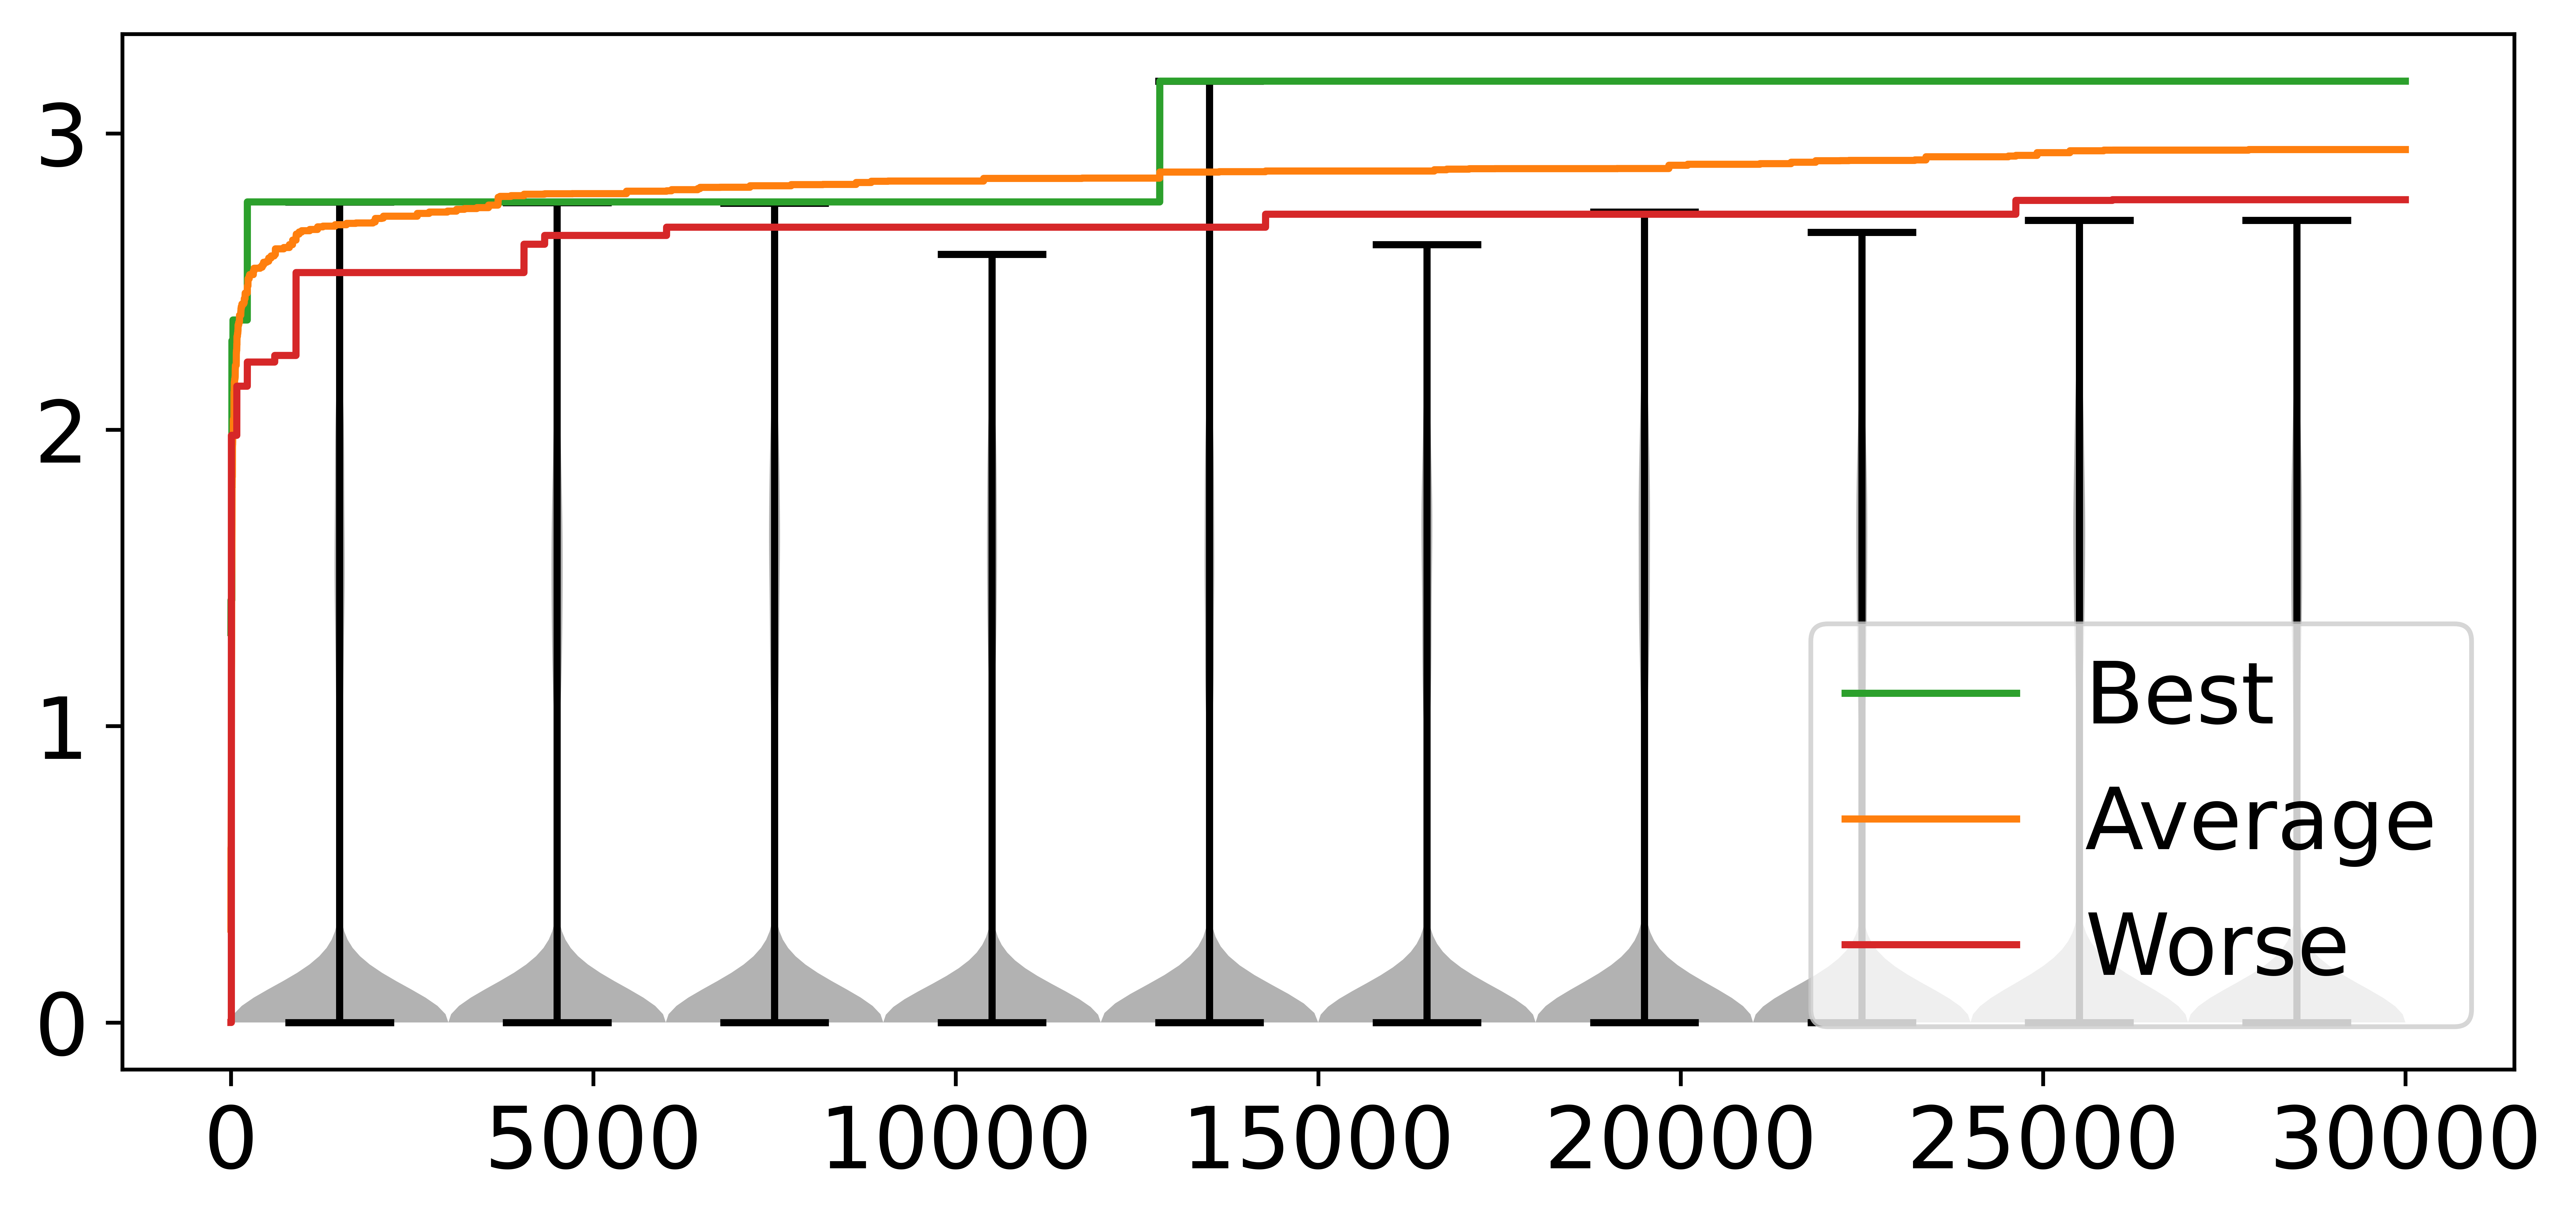

In [32]:
plt.plot(best_randsearch.fitness.rolling(60000, min_periods=1).max(), color='tab:green', label='Best')
plt.plot(avg_randsearch, color='tab:orange', label='Average')
plt.plot(worse_randsearch.fitness.rolling(60000, min_periods=1).max(), color='tab:red', label='Worse')

boxes, positions = [], []
for i in range(10):
    boxes.append(best_randsearch.fitness.iloc[int(i/10 * len(best_randsearch)):int((i+1)/10 * len(best_randsearch))])
    positions.append(int((i+0.5)/10 * len(best_randsearch)))
plt.violinplot(boxes, positions=positions, widths=int(0.1 * len(best_randsearch)))

plt.legend()

In [33]:
df_best = res_optunacmaes_da1[best_optunacmaes_da1]
baseline=True
baseline_len=4000

boxes, positions = [], []
for i in range(10):
    boxes.append(df_best.fitness.iloc[int(i/10 * len(df_best)):int((i+1)/10 * len(df_best))])
    positions.append(int((i+0.5)/10 * len(df_best)))
plt.violinplot(boxes, positions=positions, widths=int(0.1 * len(df_best)))
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.8, lw=3, zorder=-1)
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.8, lw=3, label='Solution', zorder=-1)
if baseline: plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search', zorder=-2)
plt.xticks([int(i/10 * len(df_best)) for i in range(11)])
plt.grid(alpha=0.12, linestyle='--')
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.ylabel('Fitness')
plt.xlabel('Iteration')

plt.annotate('CMA-ES\n(13 392, 2.65)', xy=(13392, 2.65), xytext=(0,-60), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('TPE\n(30 698, 2.73)', xy=(30698, 2.73), xytext=(0,-60), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Hill Climb\n(2 704, 2.54)', xy=(2704, 2.54), xytext=(0,-60), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Simulated Annealing\n(4 317, 2.54)', xy=(4317, 2.54), xytext=(0,20), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Genetic Algorithms\n(6 846, 2.65)', xy=(6846, 2.65), xytext=(0,-105), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.scatter([13392, 30698, 2704, 4317, 6846], [2.65, 2.73, 2.54, 2.54, 2.65], s=8, color='red', zorder = 3)

plt.legend(prop={'size': 16}, loc='lower right');

NameError: name 'res_optunacmaes_da1' is not defined

In [1]:
type1_figure(res_random_search_da1, baseline=False)

plt.annotate('CMA-ES\n(13 392, 2.65)', xy=(13392, 2.65), xytext=(0,-60), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('TPE\n(30 698, 2.73)', xy=(30698, 2.73), xytext=(0,-60), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Hill Climb\n(2 704, 2.54)', xy=(2704, 2.54), xytext=(0,-60), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Simulated Annealing\n(4 317, 2.54)', xy=(4317, 2.54), xytext=(0,20), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Genetic Algorithms\n(6 846, 2.65)', xy=(6846, 2.65), xytext=(0,-105), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.scatter([13392, 30698, 2704, 4317, 6846], [2.65, 2.73, 2.54, 2.54, 2.65], s=8, color='red', zorder = 3)

plt.legend(loc='lower left', prop={'size': 16}, ncol=2);
plt.savefig('img/001_random_search.pdf', format='pdf', bbox_inches='tight')

NameError: name 'type1_figure' is not defined

### CMAES

In [ ]:
res_optunacmaes_da1[best_optunacmaes_da1][res_optunacmaes_da1[best_optunacmaes_da1].fitness > res_optunacmaes_da1[best_optunacmaes_da1].fitness.max()*0.99].iloc[0].name, res_optunacmaes_da1[best_optunacmaes_da1].fitness.max()

In [ ]:
type1_figure(res_optunacmaes_da1[best_optunacmaes_da1], baseline_len=4000)

plt.annotate('Reached\nscore of 3.5\n(3 839, 3.88)', xy=(3839, 3.88), xytext=(0,-60), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Improved <1%\nin ~6 200 iterations\n(9 999, 3.90)', xy=(4000, 3.90), xytext=(-50,-60), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.scatter([3839, 4000], [3.88, 3.90], s=8, color='red', zorder = 3)

plt.legend(prop={'size': 16});
plt.savefig('img/002_cmaes_ind.pdf', format='pdf', bbox_inches='tight')

In [ ]:
df_best = res_optunacmaes_da1[best_optunacmaes_da1]
baseline=True
baseline_len=4000

boxes, positions = [], []
for i in range(10):
    boxes.append(df_best.fitness.iloc[int(i/10 * len(df_best)):int((i+1)/10 * len(df_best))])
    positions.append(int((i+0.5)/10 * len(df_best)))
plt.violinplot(boxes, positions=positions, widths=int(0.1 * len(df_best)))
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.8, lw=3, zorder=-1)
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.8, lw=3, label='Solution', zorder=-1)
if baseline: plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search', zorder=-2)
plt.xticks([int(i/10 * len(df_best)) for i in range(11)])
plt.grid(alpha=0.12, linestyle='--')
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.ylabel('Fitness')
plt.xlabel('Iteration')

plt.annotate('Reached\nscore of 3.5\n(3 839, 3.88)', xy=(3839, 3.88), xytext=(0,-60), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Improved <1%\nin ~6 200 iterations\n(9 999, 3.90)', xy=(4000, 3.90), xytext=(-50,-60), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.scatter([3839, 4000], [3.88, 3.90], s=8, color='red', zorder = 3)
plt.ylim([0, 4])

plt.legend(prop={'size': 16}, loc='lower right');

In [ ]:
type2_figure(res_optunacmaes_da1, baseline_len=10000)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 16});
plt.ylim([1.5,4])
plt.savefig('img/003_cmaes.pdf', format='pdf', bbox_inches='tight')

### TPE

In [ ]:
type1_figure(res_optunatpe_da1[best_optunatpe_da1])

plt.annotate('Many unproductive iterations\nacross all iteration range', xy=(8000, -1.2), xytext=(0,-45), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Fails to improve\nlocal minimum\n(3 675-6 358, 3.36)', xy=(5000, 3.36), xytext=(0,-90), textcoords='offset points', ha='center', va='center', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('Reached\nscore of 3.54\n(7 239, 3.54)', xy=(7239, 3.54), xytext=(0,-60), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white'), arrowprops=dict(arrowstyle='->', color='red'))
plt.scatter([7239], [3.54], s=4, color='red', zorder = 3)
plt.plot([3675, 6358], [3.36, 3.36], lw=3, color='orange')

plt.legend(loc='lower left', prop={'size': 16});
plt.savefig('img/004_tpe_ind.pdf', format='pdf', bbox_inches='tight')

In [ ]:
df_best = res_optunatpe_da1[best_optunatpe_da1]
baseline=True
baseline_len=4000

boxes, positions = [], []
for i in range(10):
    boxes.append(df_best.fitness.iloc[int(i/10 * len(df_best)):int((i+1)/10 * len(df_best))])
    positions.append(int((i+0.5)/10 * len(df_best)))
plt.violinplot(boxes, positions=positions, widths=int(0.1 * len(df_best)))
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.8, lw=3, zorder=-1)
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.8, lw=3, label='Solution', zorder=-1)
if baseline: plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search', zorder=-2)
plt.xticks([int(i/10 * len(df_best)) for i in range(11)])
plt.grid(alpha=0.12, linestyle='--')
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.ylabel('Fitness')
plt.xlabel('Iteration')


plt.legend(prop={'size': 16}, loc='lower right');

In [ ]:
type2_figure(res_optunatpe_da1, baseline_len=10000)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 16});
plt.ylim([1.5,4])
plt.savefig('img/005_tpe.pdf', format='pdf', bbox_inches='tight')

### Hill climb

In [ ]:
type1_figure(res_hillclimb_da1_s[best_hillclimb_da1_s], baseline_len=3800)

plt.legend(loc='lower right', prop={'size': 16});
plt.savefig('img/006_hillclimb_ind.pdf', format='pdf', bbox_inches='tight')

In [ ]:
df_best = res_hillclimb_da1_s[best_hillclimb_da1_s]
baseline=True
baseline_len=4000

boxes, positions = [], []
for i in range(10):
    boxes.append(df_best.fitness.iloc[int(i/10 * len(df_best)):int((i+1)/10 * len(df_best))])
    positions.append(int((i+0.5)/10 * len(df_best)))
plt.violinplot(boxes, positions=positions, widths=int(0.1 * len(df_best)))
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.8, lw=3, zorder=-1)
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.8, lw=3, label='Solution', zorder=-1)
if baseline: plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search', zorder=-2)
plt.xticks([int(i/10 * len(df_best)) for i in range(11)])
plt.grid(alpha=0.12, linestyle='--')
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.ylabel('Fitness')
plt.xlabel('Iteration')


plt.legend(prop={'size': 16}, loc='lower right');

In [ ]:
type2_figure(res_hillclimb_da1_s)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 16});
plt.ylim([1,4])
plt.savefig('img/007_hillclimb.pdf', format='pdf', bbox_inches='tight')

### Simulated annealing

In [ ]:
type1_figure(res_simannealing_da1_s[best_simannealing_da1_s], baseline_len=9000)

plt.legend(loc='lower left', prop={'size': 16});
plt.savefig('img/008_simulatedannealing_ind.pdf', format='pdf', bbox_inches='tight')

In [ ]:
df_best = res_simannealing_da1_s[best_simannealing_da1_s]
baseline=True
baseline_len=4000

boxes, positions = [], []
for i in range(10):
    boxes.append(df_best.fitness.iloc[int(i/10 * len(df_best)):int((i+1)/10 * len(df_best))])
    positions.append(int((i+0.5)/10 * len(df_best)))
plt.violinplot(boxes, positions=positions, widths=int(0.1 * len(df_best)))
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.8, lw=3, zorder=-1)
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.8, lw=3, label='Solution', zorder=-1)
if baseline: plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search', zorder=-2)
plt.xticks([int(i/10 * len(df_best)) for i in range(11)])
plt.grid(alpha=0.12, linestyle='--')
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.ylabel('Fitness')
plt.xlabel('Iteration')


plt.legend(prop={'size': 16}, loc='lower right');

In [ ]:
type2_figure(res_simannealing_da1_s, baseline_len=8000)

# plt.annotate('Reached\nscore of 3.89\n(281, 3.89)', xy=(281, 3.89), xytext=(0,-50), textcoords='offset points', ha='center', va='bottom', fontsize='x-small', bbox=dict(boxstyle='square,pad=0.2', fc='white', alpha=0.6), arrowprops=dict(arrowstyle='->', color='red'))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 16});
plt.ylim([1.5,4])
plt.savefig('img/009_simulatedannealing.pdf', format='pdf', bbox_inches='tight')

### Genetic alg

In [ ]:
type1_figure(res_genetic_da1_s[best_genetic_da1_s], baseline_len=3800)

plt.legend(loc='lower right', prop={'size': 16});
#plt.ylim([1.5, 4])
plt.savefig('img/010_geneticalgo_ind.pdf', format='pdf', bbox_inches='tight')

In [ ]:
df_best = res_genetic_da1_s[best_genetic_da1_s]
baseline=True
baseline_len=4000

boxes, positions = [], []
for i in range(10):
    boxes.append(df_best.fitness.iloc[int(i/10 * len(df_best)):int((i+1)/10 * len(df_best))])
    positions.append(int((i+0.5)/10 * len(df_best)))
plt.violinplot(boxes, positions=positions, widths=int(0.1 * len(df_best)))
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='C0', alpha=0.8, lw=3, zorder=-1)
plt.plot(df_best.fitness.rolling(60000, min_periods=1).max(), color='red', alpha=0.8, lw=3, label='Solution', zorder=-1)
if baseline: plt.plot(res_random_search_da1.fitness.iloc[:baseline_len].rolling(60000, min_periods=1).max(), color='C3', label='Random Search', zorder=-2)
plt.xticks([int(i/10 * len(df_best)) for i in range(11)])
plt.grid(alpha=0.12, linestyle='--')
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.ylabel('Fitness')
plt.xlabel('Iteration')


plt.legend(prop={'size': 16}, loc='lower right');

In [ ]:
type2_figure(res_genetic_da1_s, baseline_len=16000)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 16});
plt.ylim([1.5,4])
plt.savefig('img/011_geneticalgo.pdf', format='pdf', bbox_inches='tight')

### General figs

In [ ]:
plt.plot(res_random_search_da1.fitness.iloc[:20000].rolling(60000, min_periods=1).max(), lw=3, color='C0', label='Random Search')
plt.plot(res_optunacmaes_da1[best_optunacmaes_da1].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:orange', label='CMA-ES')
plt.plot(res_optunatpe_da1[best_optunatpe_da1].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:red', label='TPE')
plt.plot(res_hillclimb_da1_s[best_hillclimb_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:cyan', alpha=0.8, label='Hill Climb')
plt.plot(res_simannealing_da1_s[best_simannealing_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:blue', alpha=0.8, label='Simulated Annealing')
plt.plot(res_genetic_da1_s[best_genetic_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:green', alpha=0.8, label='Genetic Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend(prop={'size': 16}, ncol=2);
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.ylim([1.5,4])
plt.savefig('img/012_allalgo.pdf', format='pdf', bbox_inches='tight')

In [ ]:
plt.plot(res_random_search_da1.fitness.iloc[:20000].rolling(60000, min_periods=1).max(), lw=3, color='C0', label='Random Search')
plt.plot(res_optunacmaes_da1[best_optunacmaes_da1].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:orange', label='CMA-ES')
plt.plot(res_optunatpe_da1[best_optunatpe_da1].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:red', label='TPE')
plt.plot(res_hillclimb_da1_s[best_hillclimb_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:cyan', alpha=0.8, label='Hill Climb')
plt.plot(res_simannealing_da1_s[best_simannealing_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:blue', alpha=0.8, label='Simulated Annealing')
plt.plot(res_genetic_da1_s[best_genetic_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:green', alpha=0.8, label='Genetic Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend(loc='lower right', prop={'size': 14}, ncol=2);
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.xscale('log')
plt.ylim([1, 4])
plt.savefig('img/013_allalgologscale.pdf', format='pdf', bbox_inches='tight')

In [ ]:
cma_time_per_it = (np.mean(res_optunacmaes_da1[best_optunacmaes_da1].cycle_time))
tpe_time_per_it = (np.mean(res_optunatpe_da1[best_optunatpe_da1].cycle_time))
hcl_time_per_it = (res_hillclimb_da1_s[best_hillclimb_da1_s].groupby('iteration').min().cycle_time / 40).mean()
san_time_per_it = (res_simannealing_da1_s[best_simannealing_da1_s].groupby('iteration').min().cycle_time / 40).mean()
gen_time_per_it = (res_genetic_da1_s[best_genetic_da1_s].groupby('iteration').min().cycle_time / 40).mean()
cma_time_per_it, tpe_time_per_it, hcl_time_per_it, san_time_per_it, gen_time_per_it

In [ ]:
plt.plot(res_random_search_da1.cycle_time.rolling(60000, min_periods=1).sum(), res_random_search_da1.fitness.rolling(60000, min_periods=1).max(), lw=3, color='C0', label='Random Search')
plt.plot(res_optunacmaes_da1[best_optunacmaes_da1].cycle_time.rolling(60000, min_periods=1).sum(), res_optunacmaes_da1[best_optunacmaes_da1].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:orange', label='CMA-ES')
plt.plot(res_optunatpe_da1[best_optunatpe_da1].cycle_time.rolling(60000, min_periods=1).sum(), res_optunatpe_da1[best_optunatpe_da1].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:red', label='TPE')
plt.plot(res_hillclimb_da1_s[best_hillclimb_da1_s].index * hcl_time_per_it, res_hillclimb_da1_s[best_hillclimb_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:cyan', alpha=0.8, label='Hill Climb')
plt.plot(res_simannealing_da1_s[best_simannealing_da1_s].index * san_time_per_it, res_simannealing_da1_s[best_simannealing_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:blue', alpha=0.8, label='Simulated Annealing')
plt.plot(res_genetic_da1_s[best_genetic_da1_s].index * gen_time_per_it, res_genetic_da1_s[best_genetic_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:green', alpha=0.8, label='Genetic Algorithm')
plt.xlabel('Time spent (s)')
plt.ylabel('Fitness')
plt.legend(prop={'size': 16}, ncol=2);
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.ylim([1.5,4])
plt.savefig('img/014_allalgotime.pdf', format='pdf', bbox_inches='tight')

#### Worst

In [ ]:
plt.plot(res_random_search_da1.fitness.iloc[:10000].rolling(60000, min_periods=1).max(), lw=3, color='C0', label='Random Search')
plt.plot(res_optunacmaes_da1[worse_optunacmaes_da1].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:orange', label='CMA-ES')
plt.plot(res_optunatpe_da1[worse_optunatpe_da1].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:red', label='TPE')
plt.plot(res_hillclimb_da1_s[worse_hillclimb_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:cyan', alpha=0.8, label='Hill Climb')
plt.plot(res_simannealing_da1_s[worse_simannealing_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:blue', alpha=0.8, label='Simulated Annealing')
plt.plot(res_genetic_da1_s[worse_genetic_da1_s].fitness.rolling(60000, min_periods=1).max(), lw=3, color='tab:green', alpha=0.8, label='Genetic Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.legend(prop={'size': 16});
plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
plt.ylim([1.5,4])
plt.savefig('img/015_allalgo_worst.pdf', format='pdf', bbox_inches='tight')

a